# Module B: Section 17.4, 17.5
## Problems

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Scipy imports to test against custom implementations
from scipy.interpolate import lagrange

### Lagrange Interpolation

In [2]:
def lagrange_interp(x: np.array, y: np.array, X: np.array) -> np.array:
    """
    Lagrange interpolator for a set of data points.
    :param x: x-coordinates of data points
    :param y: y-coordinates of data points
    :param X: x-coordinates of interpolation points
    :return: y-coordinates of interpolation points
    """

    # Initialize output array with zeros of same shape as X
    Y = np.zeros(len(X))

    numer_func = lambda x_val, x_j: x_val - x_j
    denom_func = lambda x_i, x_j: x_i - x_j

    # Iterate through each X to Interp
    for _X_i, _X in enumerate(X):
        _Y = 0

        # Calculate each polynomial (Pi)
        for i, _x_i in enumerate(x):
            # Initialize P_i
            P_i = 1

            # Get y value for x
            y_i = y[i]

            # Iterate through each x data
            for j, _x_j in enumerate(x):
                if j != i:
                    P_i = P_i * (numer_func(_X, _x_j)) / (denom_func(_x_i, _x_j))

            # Iterate L(x) step
            _Y += y_i * P_i

        # Add to Y
        Y[_X_i] = _Y

    return Y

In [3]:
# Function to test lagrange_interp and compare accuracy against scipy's lagrange interpolator
def test_lagrange_interp(x: np.array, y:np.array):
    # Test interpolation every 0.25 between x_test values
    X = np.arange(x[0] - 1, x[-1]+1, 0.25)

    # Get interpolated values
    Y = lagrange_interp(x, y, X)

    # Scipy Lagrange Interpolation to compare against
    f = lagrange(x, y)

    # Create x_range to graph
    x_range = np.arange(x[0] - 1, x[-1]+1, 0.1)

    # Plot
    plt.figure(figsize = (10,8))
    plt.plot(x_range, f(x_range), 'b', label="Actual")
    plt.plot(X, Y, 'ro', label="Interpolated")
    plt.title('Lagrange Polynomial')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    # Check error
    test_error = np.mean(
        np.abs(
            (Y - f(X)) / f(X)*100
        )
    )

    # Print percent error
    print(f'Percent Error: {round(test_error, 5)}%')


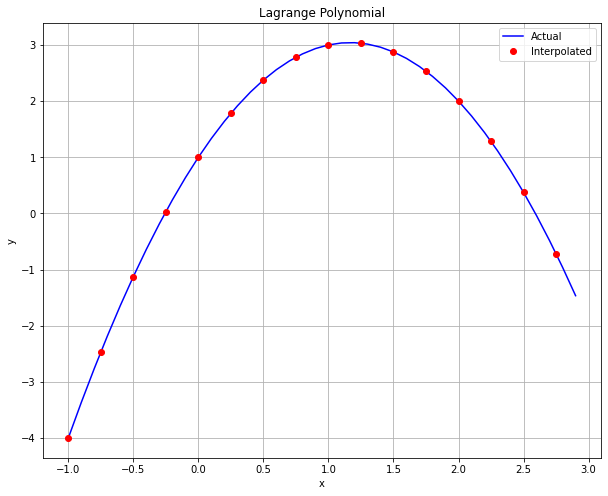

Percent Error: 0.0%


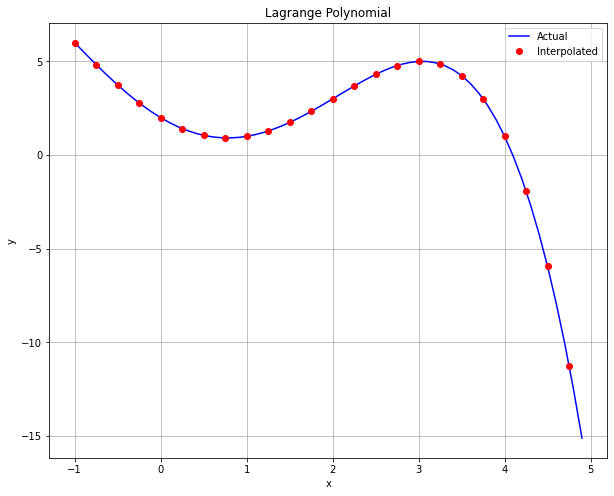

Percent Error: 0.0%


In [4]:
# Test 1
test_lagrange_interp(x = [0, 1, 2], y =  [1, 3, 2])

# Test 2
test_lagrange_interp(x = [0, 1, 2, 3, 4], y = [2, 1, 3, 5, 1])


### Newton's Polynomial Interpolation

In [5]:
def newton_interp(x: np.array, y: np.array, X: np.array) -> np.array:
    """
    Newton's Polynomial Interpolator for a set of data points.
    :param x: x-coordinates of data points
    :param y: y-coordinates of data points
    :param X: x-coordinates of interpolation points
    :return: y-coordinates of interpolation points
    """

    x_len = len(x)
    n = len(y)

    # Initialize output array with zeros of same shape as X
    Y = np.zeros(len(X))

    # Build the coefficients a matrix
    # Initialize coef a matrix. Square with same size as x and y
    a = np.zeros([n, n])

    # First col = y
    a[:, 0] = y

    # Build each column
    # Iterate through each col from second
    for j in range(1,n):

        # Iterate through each row until n-j
        for i in range(n-j):
            a[i][j] = (a[i+1][j-1] - a[i][j-1]) / (x[i+j]-x[i])

    # Get the interpolated values
    # Coefficients are the first row
    coef = a[0, :]

    n = x_len - 1

    for i, _X in enumerate(X):
        _Y = coef[n]
        for j in range(1,n+1):
            _Y = coef[n-j] + (_X -x[n-j])*_Y

        Y[i] = _Y

    return Y

In [6]:
def test_newton_interp(x: np.array, y: np.array):
    # Test interpolation every 0.25 between x_test values
    X = np.arange(x[0] - 1, x[-1]+1, 0.25)

    # Get interpolated values
    Y = newton_interp(x, y, X)

    # Scipy Lagrange Interpolation to compare against
    f = lagrange(x, y)

    # Create x_range to graph
    x_range = np.arange(x[0] - 1, x[-1]+1, 0.1)

    # Plot
    plt.figure(figsize = (10,8))
    plt.plot(x_range, f(x_range), 'b', label="Actual")
    plt.plot(X, Y, 'ro', label="Interpolated")
    plt.title('Newton Polynomial Interpolation')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    # Check error
    test_error = np.mean(
        np.abs(
            (Y - f(X)) / f(X)*100
        )
    )

    # Print percent error
    print(f'Percent Error: {round(test_error, 5)}%')

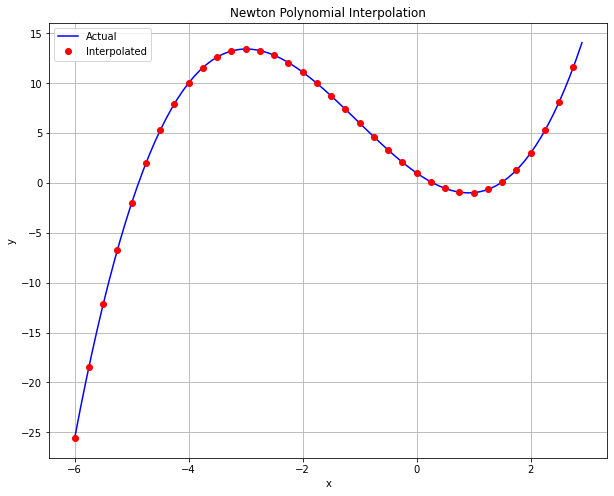

Percent Error: 0.0%


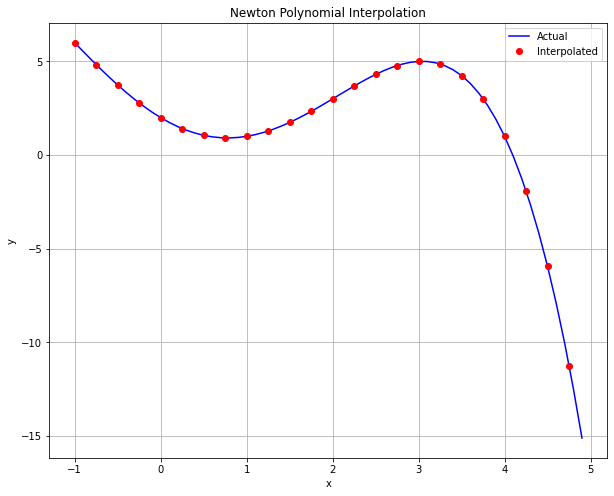

Percent Error: 0.0%


In [7]:
# Test 1
test_newton_interp(x = [-5, -1, 0, 2], y =  [-2, 6, 1, 3])

# Test 2
test_newton_interp(x = [0, 1, 2, 3, 4], y = [2, 1, 3, 5, 1])